In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = pd.read_csv("EV_vehicles.csv")
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,4860602.80
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,2628300.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,4944708.40
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,5960984.40
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,2890867.17


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Brand            103 non-null    object  
 1   Model            103 non-null    object  
 2   AccelSec         103 non-null    float64 
 3   TopSpeed_KmH     103 non-null    int64   
 4   Range_Km         103 non-null    int64   
 5   Efficiency_WhKm  103 non-null    int64   
 6   FastCharge_KmH   103 non-null    int64   
 7   RapidCharge      103 non-null    object  
 8   PowerTrain       103 non-null    object  
 9   PlugType         103 non-null    object  
 10  BodyStyle        103 non-null    object  
 11  Segment          103 non-null    category
 12  Seats            103 non-null    int64   
 13  INR              103 non-null    float64 
 14  Agg_Segment      103 non-null    int64   
 15  KMeans_Segment   103 non-null    int32   
 16  DBSCAN_Segment   103 non-null    int64   
dt

In [46]:
data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,INR,Agg_Segment,KMeans_Segment,DBSCAN_Segment
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,4.889651e+06,1.000000,1.941748,-0.747573
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,2.990538e+06,1.009756,0.988416,0.572549
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,1.763502e+06,0.000000,0.000000,-1.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,3.016368e+06,0.000000,1.000000,-1.000000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,3.942450e+06,1.000000,2.000000,-1.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,5.694650e+06,1.000000,3.000000,-1.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,1.883615e+07,3.000000,3.000000,1.000000


In [47]:
data.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
INR                0
Agg_Segment        0
KMeans_Segment     0
DBSCAN_Segment     0
dtype: int64

# Visualizations

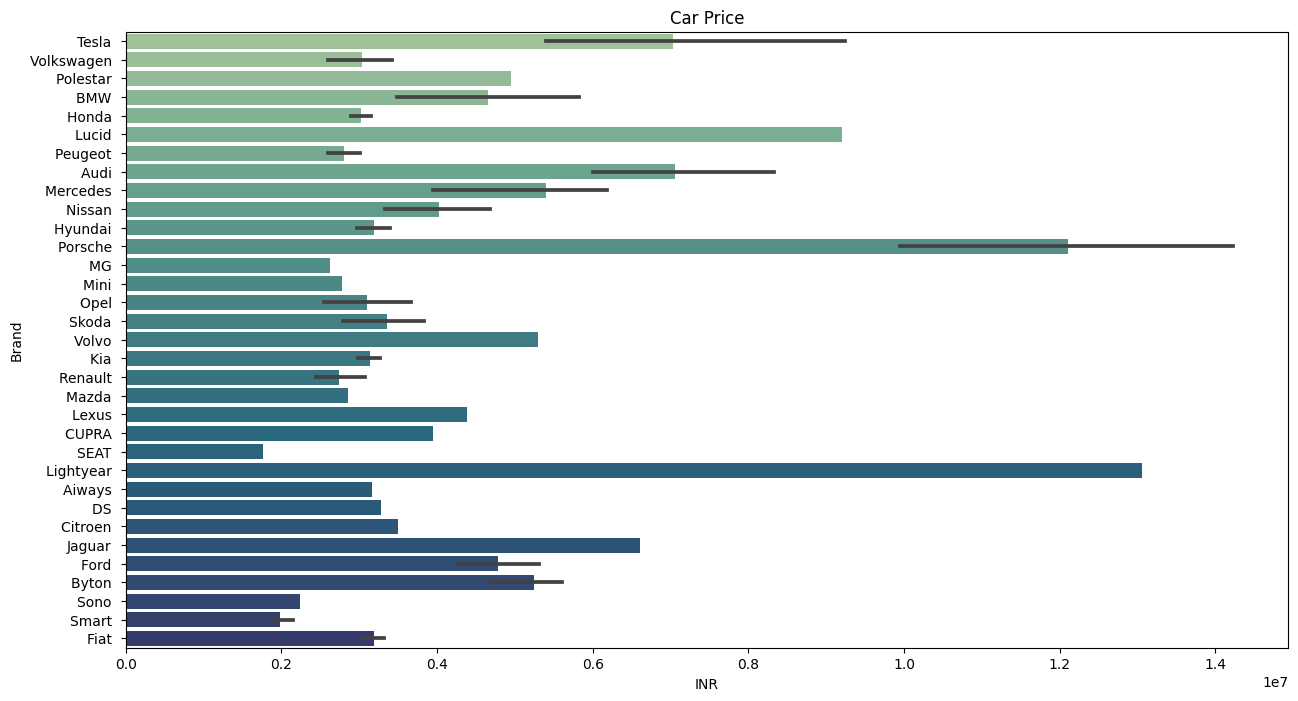

In [67]:
# Car and Their Price
plt.figure(figsize=(15,8))
sns.barplot(data=data, x = "INR", y = "Brand", palette="crest")
plt.title("Car Price")
plt.show()

Text(0.5, 1.0, 'Which Car Has The Top Speed?')

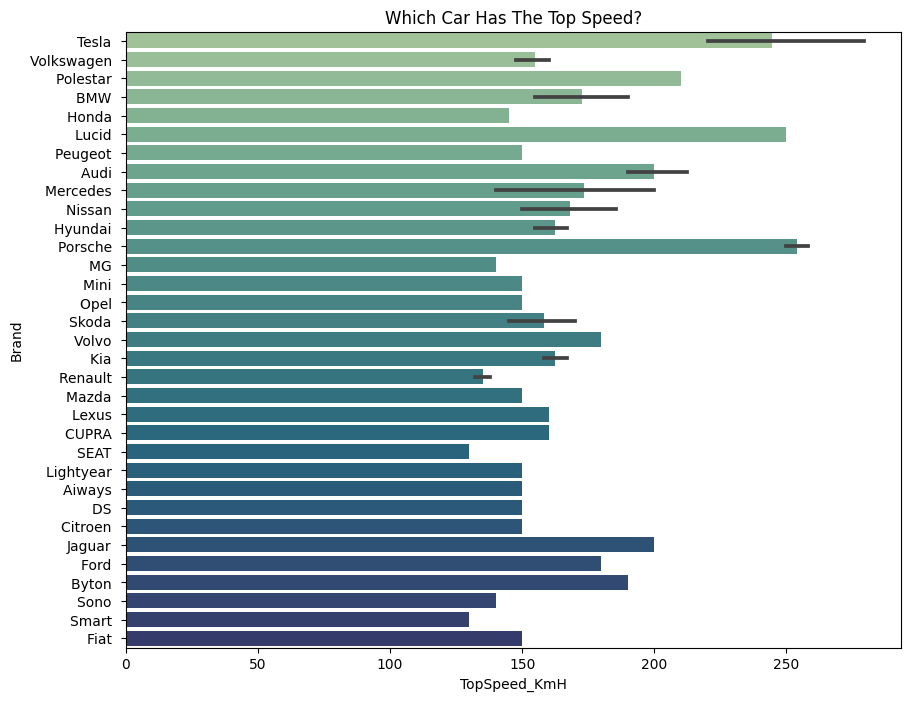

In [68]:
# Which Car Has The Top Speed?
plt.figure(figsize=(10,8))
sns.barplot(data, x = "TopSpeed_KmH", y = "Brand", palette="crest")
plt.title("Which Car Has The Top Speed?")

Text(0.5, 1.0, 'Which Car Has The Fastest acceleration?')

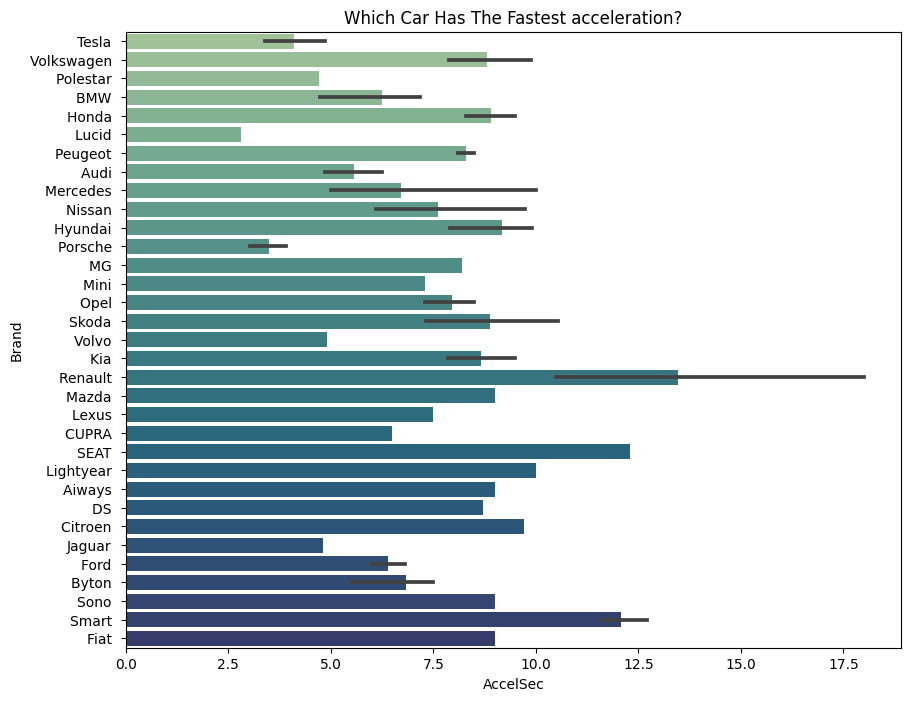

In [69]:
# Which Car Has The Fastest acceleration?
plt.figure(figsize=(10,8))
sns.barplot(data, x = "AccelSec", y = "Brand", palette="crest")
plt.title("Which Car Has The Fastest acceleration?")

<AxesSubplot: xlabel='Seats', ylabel='Brand'>

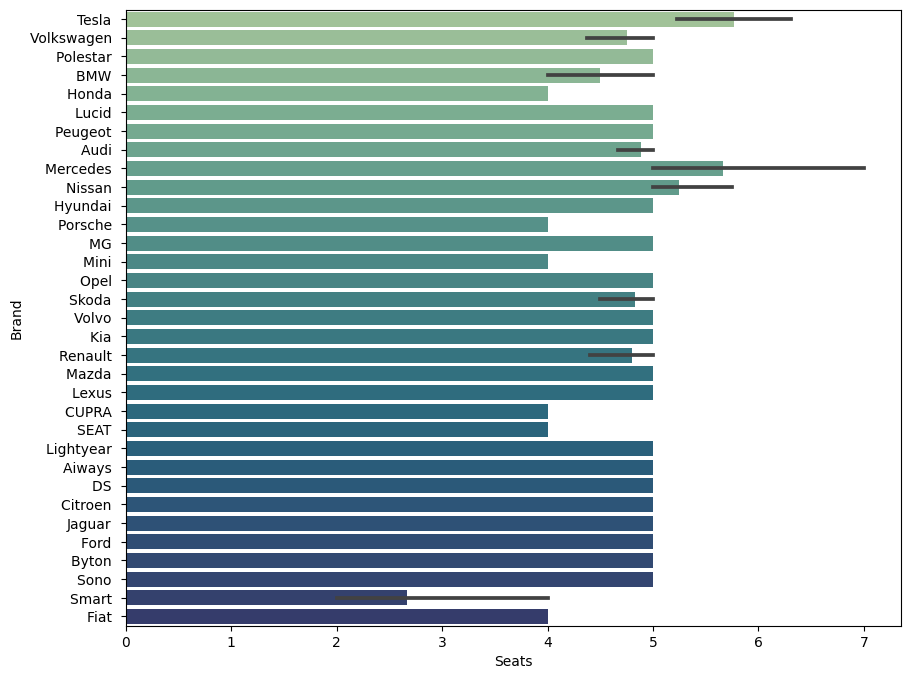

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(data, y = "Brand", x = "Seats", palette="crest")

Text(0.5, 1.0, 'Which Car Cover Most Range per Km?')

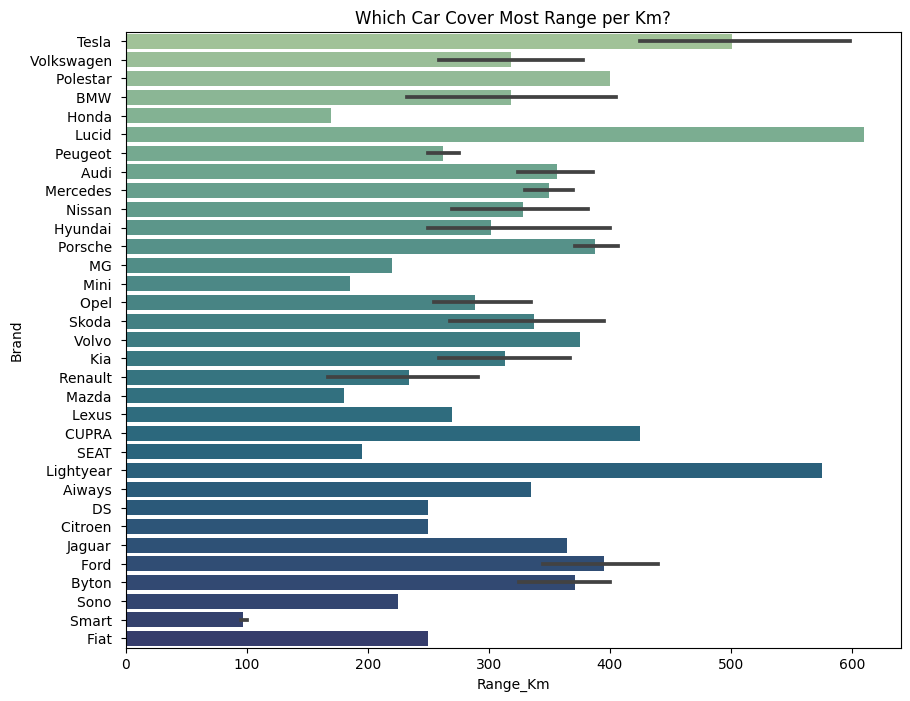

In [73]:
# "Which Car Can Cover Most Range per Km?
plt.figure(figsize=(10,8))
sns.barplot(data, x = "Range_Km", y = "Brand", palette="crest")
plt.title("Which Car Cover Most Range per Km?")

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_9844\3675954346.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='twilight')


<AxesSubplot: >

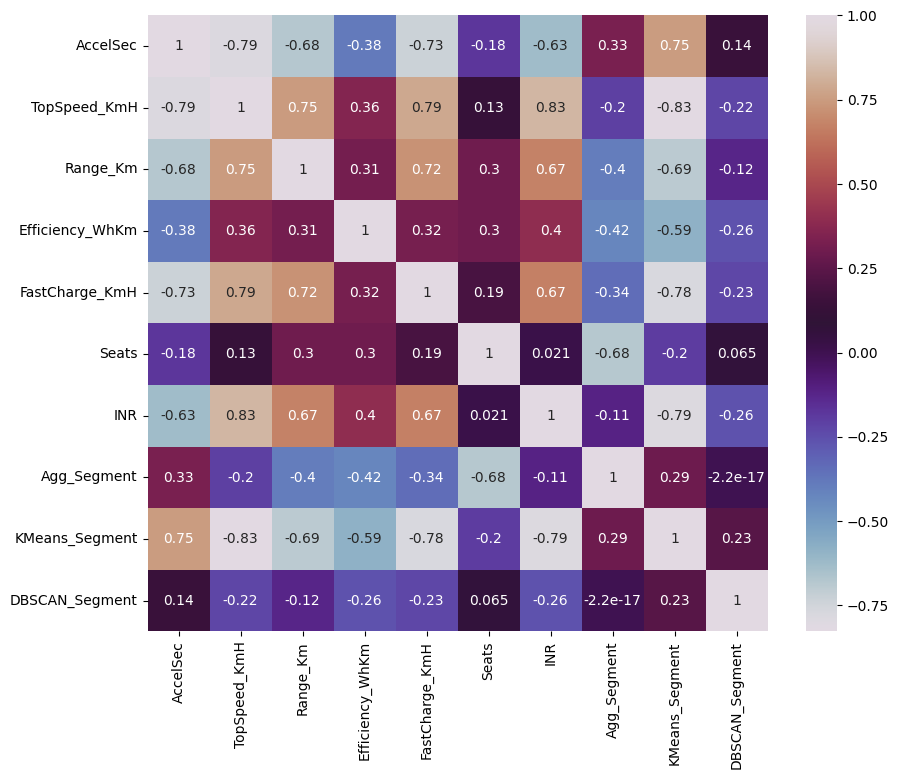

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='twilight')

Text(0, 0.5, 'No. of Models')

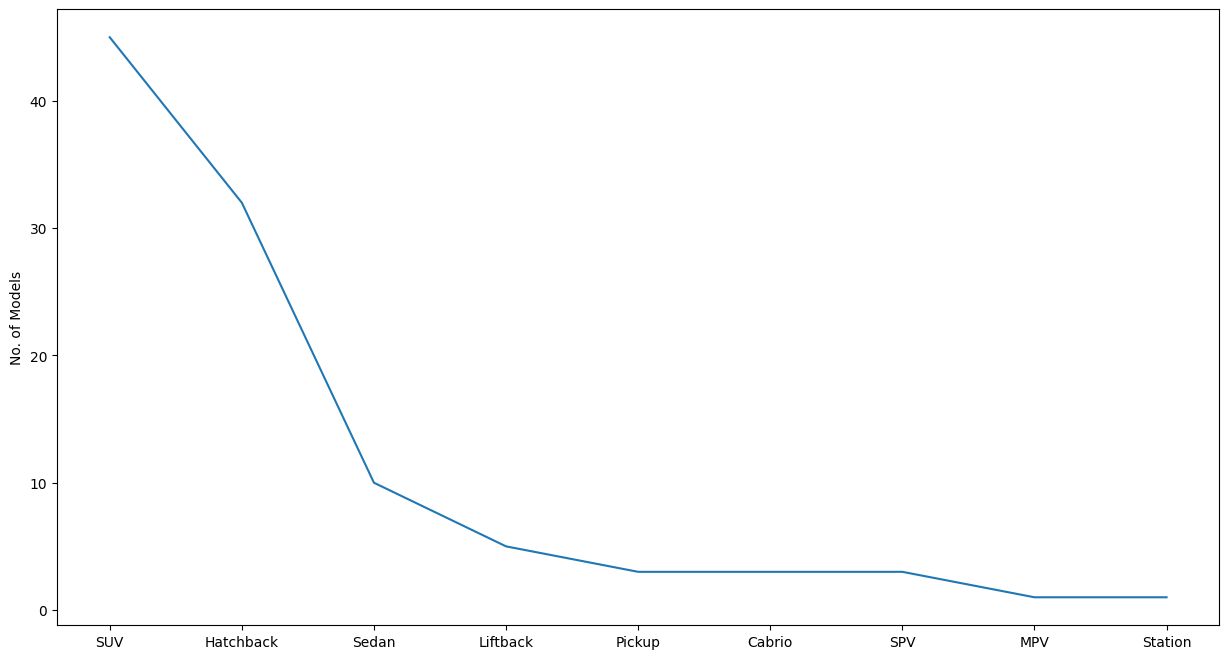

In [70]:
plt.figure(figsize=(15,8))
plt.plot(data["BodyStyle"].value_counts())
plt.ylabel("No. of Models")

Text(0.5, 1.0, 'Total Number Of Model per Brand')

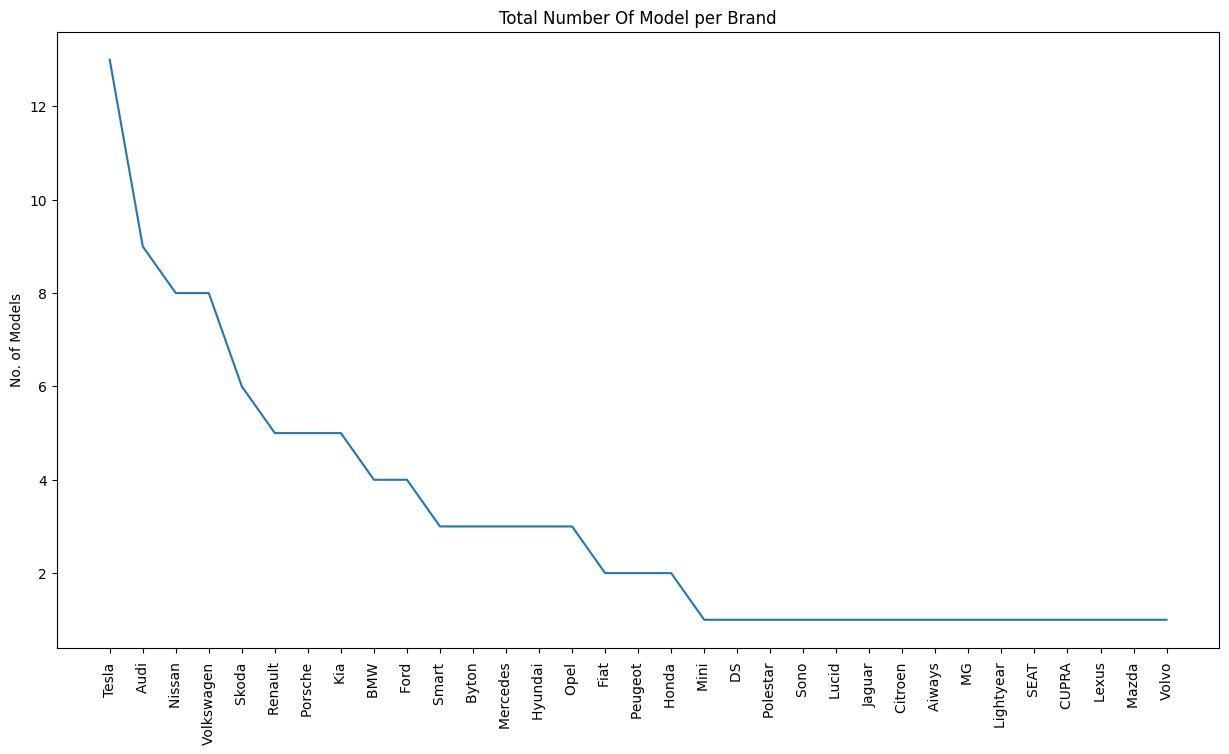

In [71]:
# Total Model from different Brands
plt.figure(figsize=(15,8))
plt.plot(data["Brand"].value_counts())
plt.xticks(rotation = 90)
plt.ylabel("No. of Models")
plt.title("Total Number Of Model per Brand")

Text(0.5, 1.0, 'Plug Type')

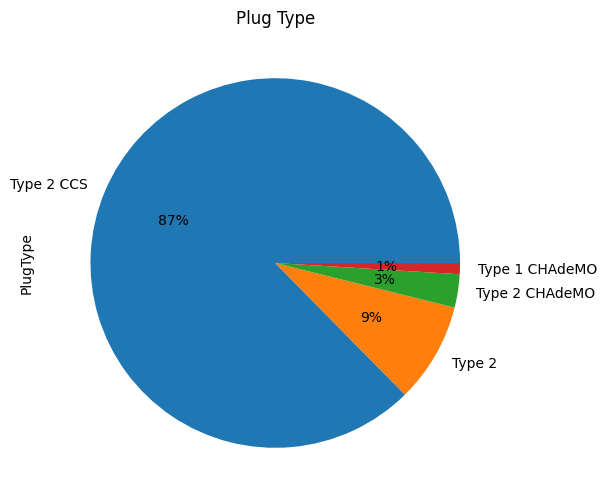

In [75]:
# what percent of Plug Type does car have?
data["PlugType"].value_counts().plot(figsize=(8,6), kind="pie", autopct='%.0f%%')
plt.title('Plug Type')

Text(0.5, 1.0, 'Rapid Charge ')

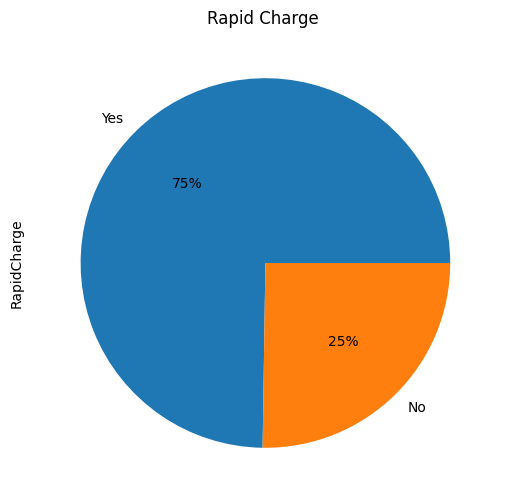

In [76]:
# what percent of car have Rapid Charge?
data["RapidCharge"].value_counts().plot(figsize=(8,6), kind="pie", autopct='%.0f%%')
plt.title('Rapid Charge ')

Text(0.5, 1.0, 'Power Train')

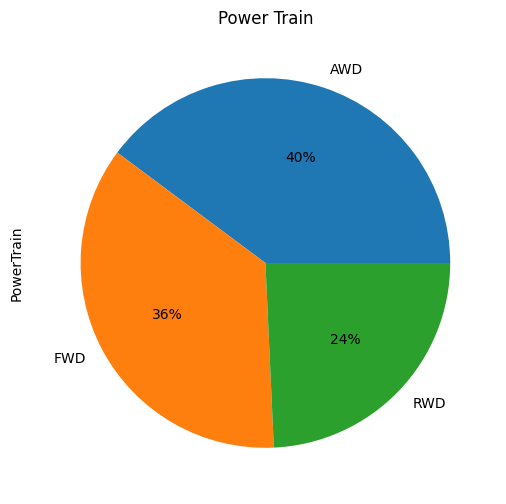

In [77]:
data["PowerTrain"].value_counts().plot(figsize=(8,6), kind="pie", autopct='%.0f%%')
plt.title('Power Train')

Text(0.5, 1.0, 'Power Train')

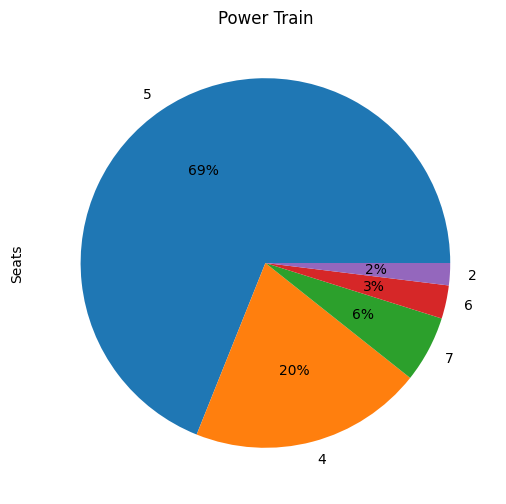

In [78]:
data["Seats"].value_counts().plot(figsize=(8,6), kind="pie", autopct='%.0f%%')
plt.title('Power Train')

# Clustering 

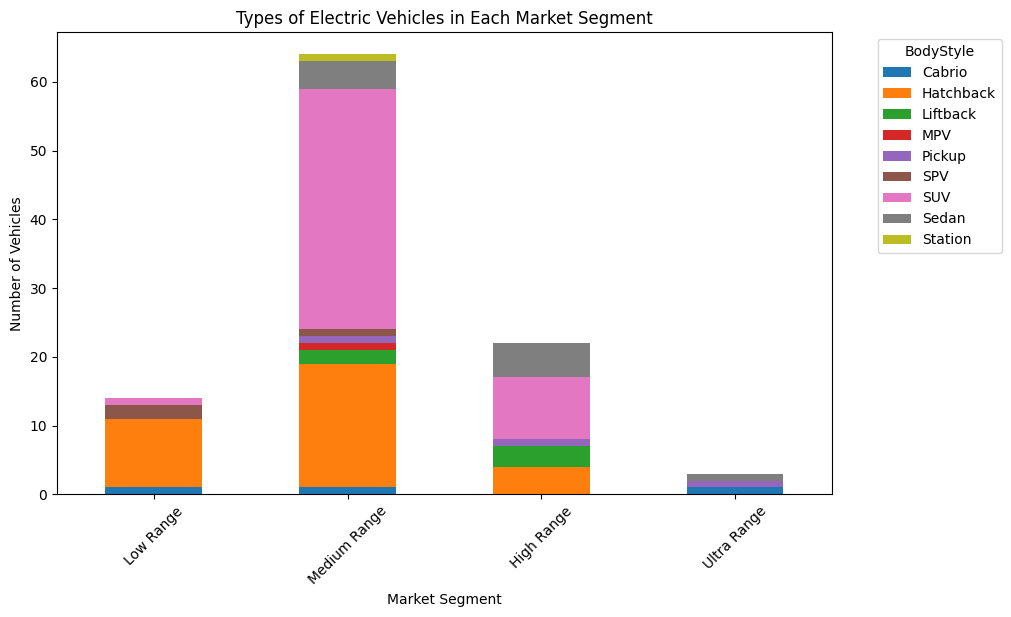

In [44]:
# You can customize the conditions for segmentation based on your business goals and criteria
data['Segment'] = pd.cut(data['Range_Km'], 
                       bins=[0, 200, 400, 600, float('inf')], 
                       labels=['Low Range', 'Medium Range', 'High Range', 'Ultra Range'])

# Count the types of EVs within each segment
segmented_counts = data.groupby(['Segment', 'BodyStyle'])['Brand'].count().unstack().fillna(0)

# Plot a stacked bar chart to visualize the types of EVs in each segment
segmented_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Types of Electric Vehicles in Each Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Vehicles')
plt.legend(title='BodyStyle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Clustering 

In [ ]:
# Convert relevant columns to numeric types
numeric_columns = ["AccelSec", "TopSpeed_KmH", "Range_Km", "Efficiency_WhKm", "Seats", "INR"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [8]:
# Select relevant columns for segmentation
selected_columns = ["AccelSec", "TopSpeed_KmH", "Range_Km", "Efficiency_WhKm", "Seats", "INR"]
df_segment = data[selected_columns]

In [9]:
# Standardize the data
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)

# Determine the optimal number of clusters (K) using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_segment_scaled)
    wcss.append(kmeans.inertia_)

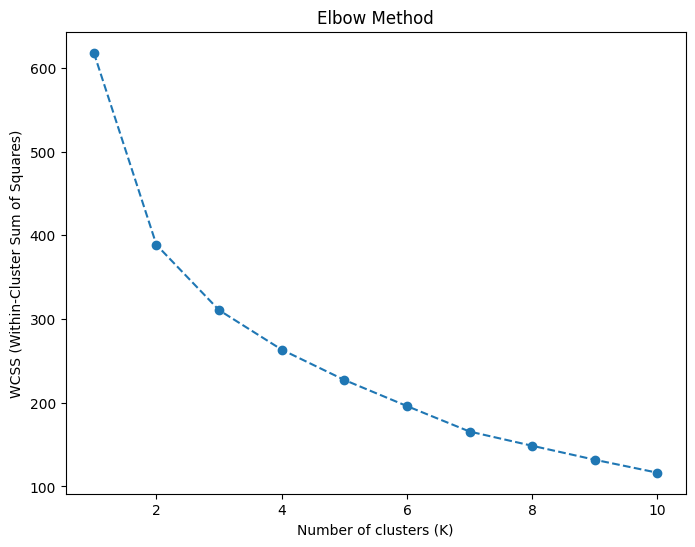

In [10]:
# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [12]:
# Based on the Elbow method, choose the optimal number of clusters (K)
k = 4 

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Segment'] = kmeans.fit_predict(df_segment_scaled)

In [ ]:
# Summarize market segments
segment_counts = data['Segment'].value_counts().sort_index()

In [15]:
# Print the segment counts
print("Segment Counts:")
print(segment_counts)

Segment Counts:
0    11
1    20
2    36
3    36
Name: Segment, dtype: int64


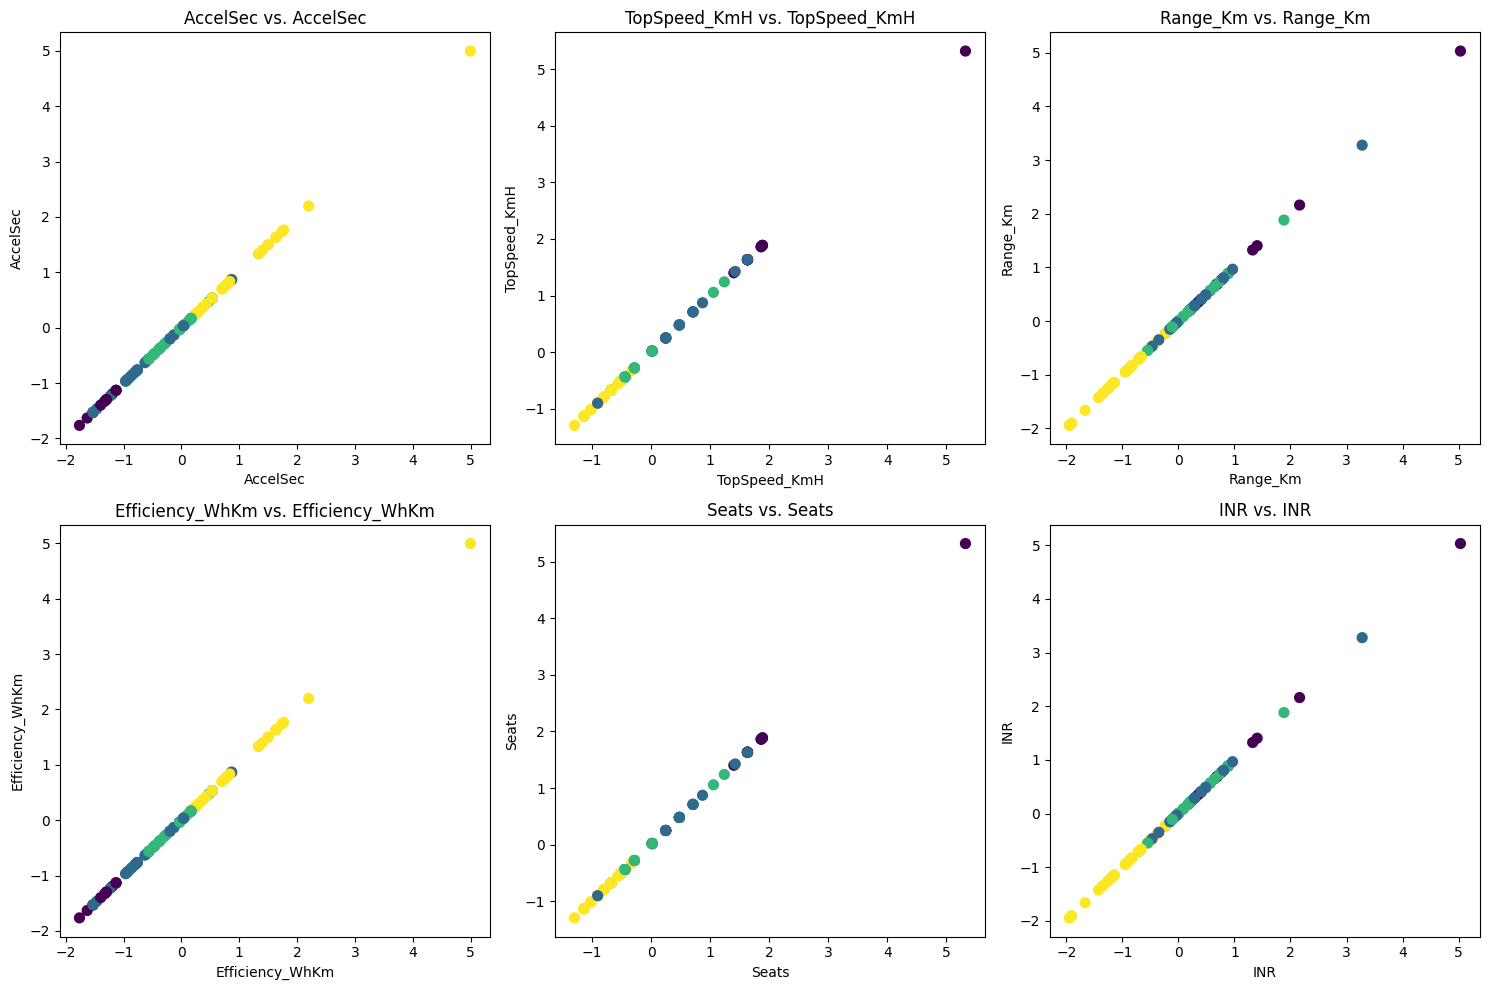

In [17]:
# Visualize the clusters
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(selected_columns):
    row, col = i // 3, i % 3
    ax[row, col].scatter(df_segment_scaled[:, col], df_segment_scaled[:, col], c=data['Segment'], s=50, cmap='viridis')
    ax[row, col].set_title(f'{selected_columns[i]} vs. {selected_columns[i]}')
    ax[row, col].set_xlabel(selected_columns[i])
    ax[row, col].set_ylabel(selected_columns[i])

plt.tight_layout()
plt.show()

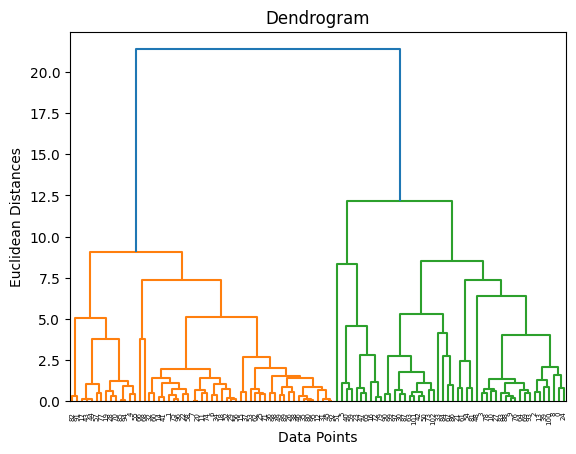

In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(df_segment_scaled, method='ward'))

# Plot the dendrogram to find the optimal number of clusters
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

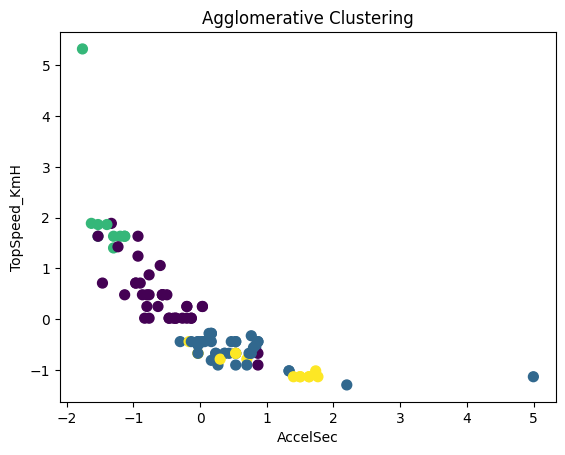

In [31]:
# Visualize Hierarchical clustering
plt.scatter(df_segment_scaled[:, 0], df_segment_scaled[:, 1], c=data['Agg_Segment'], s=50, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('AccelSec')
plt.ylabel('TopSpeed_KmH')
plt.show()

In [55]:
# Standardize the data
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['KMeans_Segment'] = kmeans.fit_predict(df_segment_scaled)

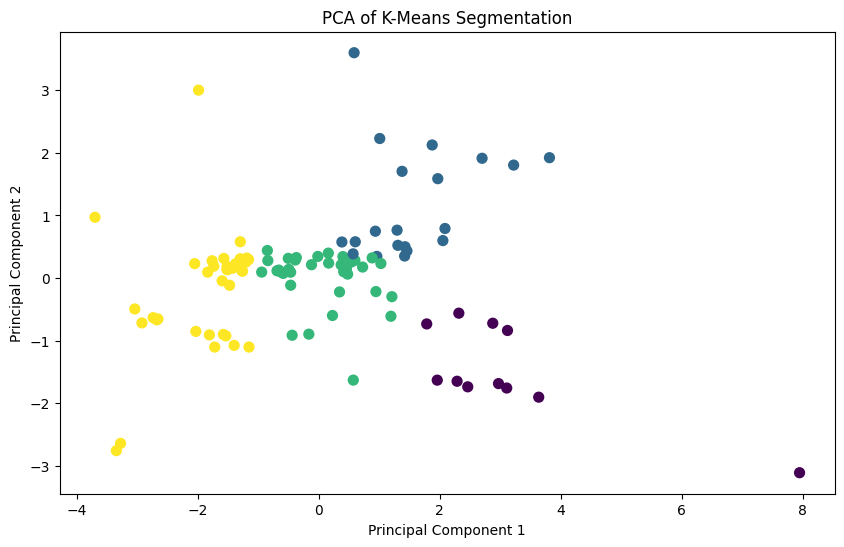

In [56]:
# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_segment_scaled)

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=data['KMeans_Segment'], cmap='viridis', s=50)
plt.title('PCA of K-Means Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [57]:
# Calculate silhouette score to evaluate the K-Means clustering
silhouette_avg = silhouette_score(df_segment_scaled, data['KMeans_Segment'])
print(f"Silhouette Score for K-Means: {silhouette_avg:.2f}")

Silhouette Score for K-Means: 0.28


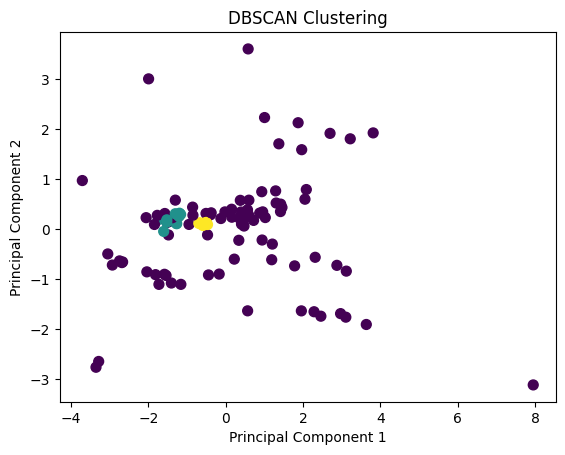

In [58]:
# Perform Density-Based Spatial Clustering (DBSCAN)
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Segment'] = dbscan.fit_predict(df_segment_scaled)

# Visualize the DBSCAN results
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=data['DBSCAN_Segment'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

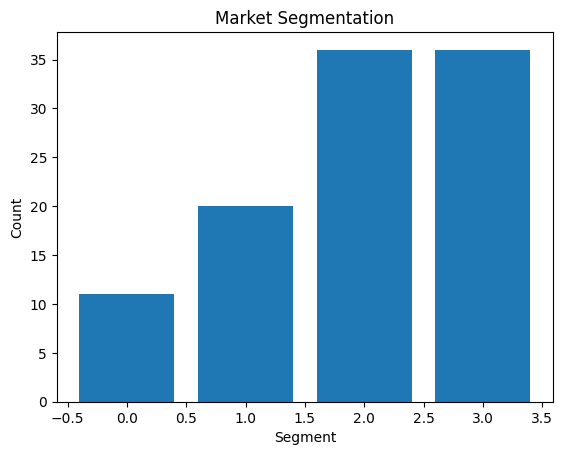

In [59]:
# Count the number of vehicles in each segment
segment_counts = data['KMeans_Segment'].value_counts().sort_index()
# Create a bar chart
plt.bar(segment_counts.index, segment_counts)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Market Segmentation')
plt.show()

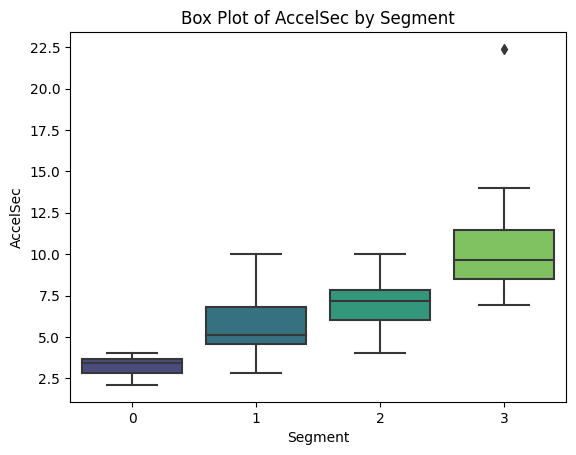

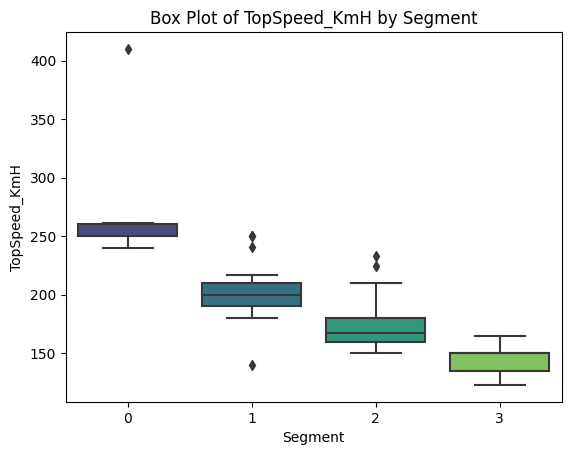

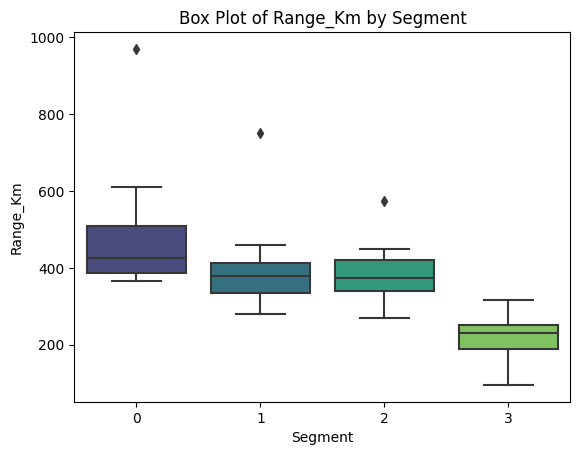

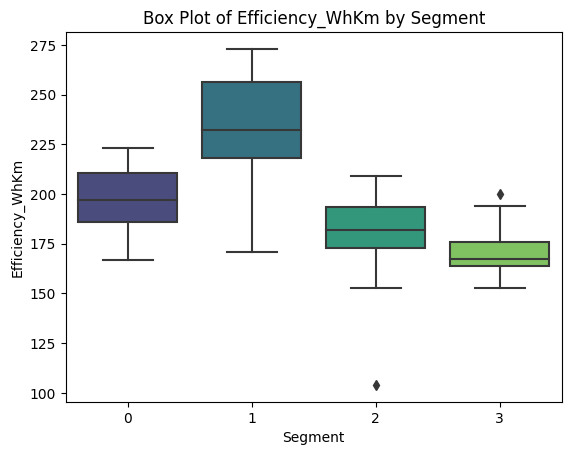

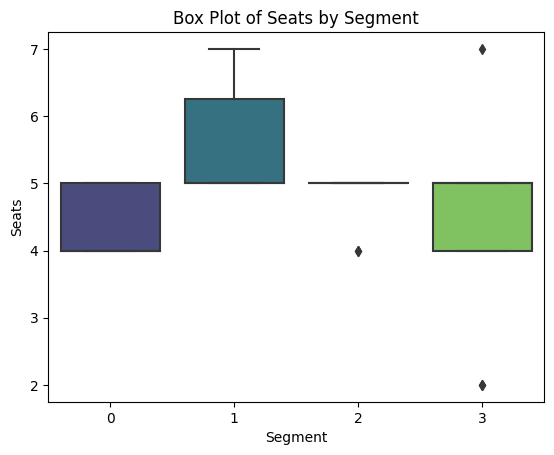

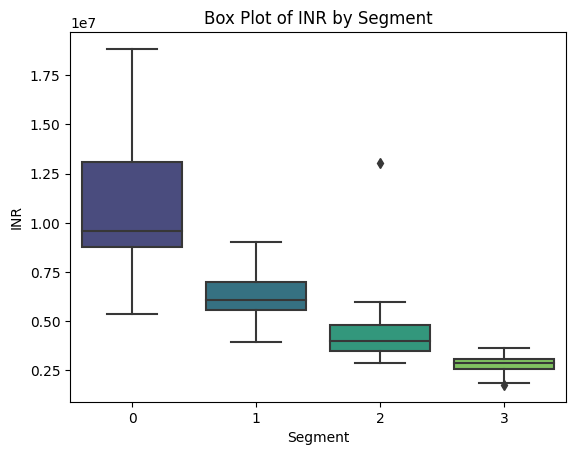

In [64]:
# Create box plots for selected attributes by segment
for col in selected_columns:
    plt.figure()
    sns.boxplot(x='KMeans_Segment', y=col, data=data, palette='viridis')
    plt.title(f'Box Plot of {col} by Segment')
    plt.xlabel('Segment')
    plt.ylabel(col)
    plt.show()

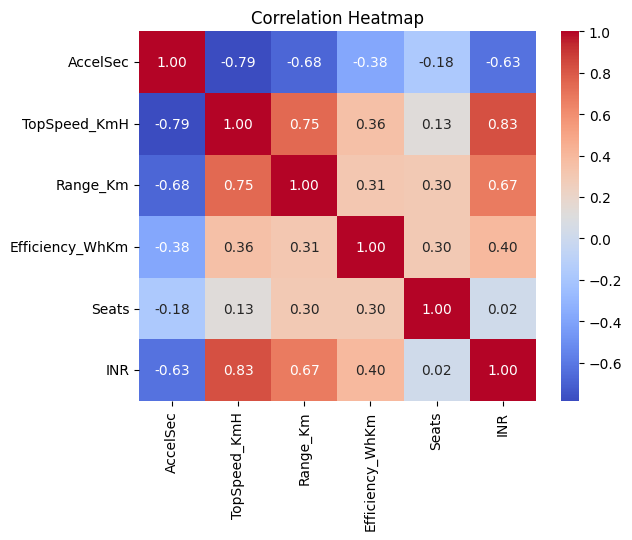

In [66]:
# Create a correlation matrix
corr_matrix = data[selected_columns].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()